# 1. Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset

In [4]:
forest = pd.read_csv('forestfires.csv')
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

# 3. EDA

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:xlabel='area', ylabel='Density'>

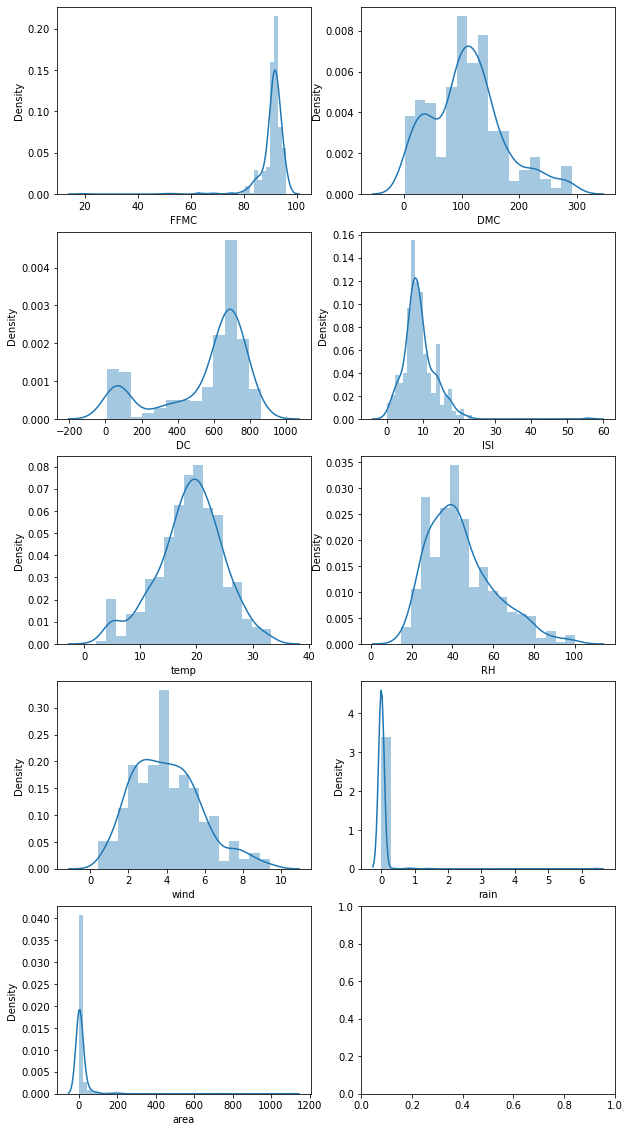

In [7]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

# 4. Data Preprocessing

In [8]:
forest.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [10]:
le=LabelEncoder()

In [11]:
forest['size_category']=le.fit_transform(forest['size_category'])
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0              1  
1           0              1  
2           0              1  
3           0              1  
4           0              1  
..        ...            ...  
512         0              0  
513         0              0  
514         0              0  
515         0              1  
516         0              1  

[517 rows x 31 columns]

In [12]:
forest.drop(['month','day'],axis=1,inplace=True)

In [13]:
X=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [15]:
std=StandardScaler()
X=std.fit_transform(X)
X

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# 5. Model Building and Training

In [16]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 54ms/step - loss: 0.6492 - accuracy: 0.6069 - val_loss: 0.7319 - val_accuracy: 0.5205
Epoch 2/250
7/7 [==============================] - 0s 10ms/step - loss: 0.6070 - accuracy: 0.6879 - val_loss: 0.7171 - val_accuracy: 0.5497
Epoch 3/250
7/7 [==============================] - 0s 9ms/step - loss: 0.5817 - accuracy: 0.7139 - val_loss: 0.7076 - val_accuracy: 0.5673
Epoch 4/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5627 - accuracy: 0.7370 - val_loss: 0.7002 - val_accuracy: 0.5965
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5479 - accuracy: 0.7514 - val_loss: 0.6928 - val_accuracy: 0.6023
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5348 - accuracy: 0.7601 - val_loss: 0.6921 - val_accuracy: 0.6433
Epoch 7/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5231 - accuracy: 0.7659 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 8/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.2125 - accuracy: 0.9191 - val_loss: 0.6903 - val_accuracy: 0.7895
Epoch 60/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2076 - accuracy: 0.9306 - val_loss: 0.6918 - val_accuracy: 0.7953
Epoch 61/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.9306 - val_loss: 0.6980 - val_accuracy: 0.7953
Epoch 62/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1949 - accuracy: 0.9335 - val_loss: 0.7018 - val_accuracy: 0.8012
Epoch 63/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1901 - accuracy: 0.9335 - val_loss: 0.7031 - val_accuracy: 0.8012
Epoch 64/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1845 - accuracy: 0.9364 - val_loss: 0.7078 - val_accuracy: 0.8070
Epoch 65/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1796 - accuracy: 0.9422 - val_loss: 0.7115 - val_accuracy: 0.8070
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9913 - val_loss: 1.0272 - val_accuracy: 0.7719
Epoch 118/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - accuracy: 0.9884 - val_loss: 1.0324 - val_accuracy: 0.7602
Epoch 119/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9942 - val_loss: 1.0419 - val_accuracy: 0.7602
Epoch 120/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9942 - val_loss: 1.0383 - val_accuracy: 0.7602
Epoch 121/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9913 - val_loss: 1.0496 - val_accuracy: 0.7661
Epoch 122/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0434 - accuracy: 0.9884 - val_loss: 1.0537 - val_accuracy: 0.7661
Epoch 123/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 1.0444 - val_accuracy: 0.7661
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 1.2443 - val_accuracy: 0.8070
Epoch 176/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2510 - val_accuracy: 0.8070
Epoch 177/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2462 - val_accuracy: 0.8070
Epoch 178/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.2566 - val_accuracy: 0.8129
Epoch 179/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 1.2601 - val_accuracy: 0.8129
Epoch 180/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9971 - val_loss: 1.2488 - val_accuracy: 0.8129
Epoch 181/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 1.2701 - val_accuracy: 0.8187
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.4142 - val_accuracy: 0.8246
Epoch 234/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4164 - val_accuracy: 0.8246
Epoch 235/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.4144 - val_accuracy: 0.8246
Epoch 236/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.4172 - val_accuracy: 0.8246
Epoch 237/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.4217 - val_accuracy: 0.8246
Epoch 238/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.8246
Epoch 239/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.4270 - val_accuracy: 0.8246
Epoch 240/250
7/7 [========

In [21]:
model.evaluate(X,y)

17/17 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.9400


[0.4849098324775696, 0.9400386810302734]

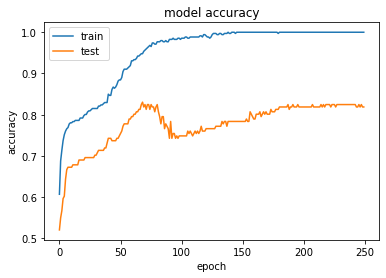

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model has low validation accuracy

### Building new model with less number of nodes in hidden layer

In [24]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 42ms/step - loss: 0.6913 - accuracy: 0.5665 - val_loss: 0.7027 - val_accuracy: 0.5731
Epoch 2/250
7/7 [==============================] - 0s 9ms/step - loss: 0.6355 - accuracy: 0.6561 - val_loss: 0.6917 - val_accuracy: 0.6433
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6039 - accuracy: 0.7312 - val_loss: 0.6902 - val_accuracy: 0.6608
Epoch 4/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5833 - accuracy: 0.7457 - val_loss: 0.6922 - val_accuracy: 0.6725
Epoch 5/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5699 - accuracy: 0.7543 - val_loss: 0.6944 - val_accuracy: 0.6784
Epoch 6/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5595 - accuracy: 0.7572 - val_loss: 0.6963 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7630 - val_loss: 0.6961 - val_accuracy: 0.6725
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.2736 - accuracy: 0.8786 - val_loss: 0.7963 - val_accuracy: 0.7018
Epoch 60/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2689 - accuracy: 0.8844 - val_loss: 0.8005 - val_accuracy: 0.6842
Epoch 61/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.8902 - val_loss: 0.8057 - val_accuracy: 0.6842
Epoch 62/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2581 - accuracy: 0.8902 - val_loss: 0.8102 - val_accuracy: 0.6959
Epoch 63/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.8931 - val_loss: 0.8158 - val_accuracy: 0.6959
Epoch 64/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2489 - accuracy: 0.8960 - val_loss: 0.8201 - val_accuracy: 0.6901
Epoch 65/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.9017 - val_loss: 0.8260 - val_accuracy: 0.6842
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.0839 - accuracy: 0.9855 - val_loss: 1.1451 - val_accuracy: 0.7018
Epoch 118/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0828 - accuracy: 0.9913 - val_loss: 1.1459 - val_accuracy: 0.7076
Epoch 119/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9913 - val_loss: 1.1615 - val_accuracy: 0.6901
Epoch 120/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0787 - accuracy: 0.9884 - val_loss: 1.1566 - val_accuracy: 0.6959
Epoch 121/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0776 - accuracy: 0.9884 - val_loss: 1.1502 - val_accuracy: 0.7018
Epoch 122/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0761 - accuracy: 0.9913 - val_loss: 1.1685 - val_accuracy: 0.7135
Epoch 123/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0739 - accuracy: 0.9913 - val_loss: 1.1749 - val_accuracy: 0.7193
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 1.4514 - val_accuracy: 0.7193
Epoch 176/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.4458 - val_accuracy: 0.7251
Epoch 177/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.4498 - val_accuracy: 0.7251
Epoch 178/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 1.4567 - val_accuracy: 0.7310
Epoch 179/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 1.4674 - val_accuracy: 0.7310
Epoch 180/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 1.4747 - val_accuracy: 0.7310
Epoch 181/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.4715 - val_accuracy: 0.7251
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.6748 - val_accuracy: 0.7544
Epoch 234/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.6818 - val_accuracy: 0.7544
Epoch 235/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.6906 - val_accuracy: 0.7544
Epoch 236/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.6996 - val_accuracy: 0.7485
Epoch 237/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.7032 - val_accuracy: 0.7485
Epoch 238/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.6956 - val_accuracy: 0.7602
Epoch 239/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.6961 - val_accuracy: 0.7544
Epoch 240/250
7/7 [========

In [25]:
model2.evaluate(X,y)

17/17 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.9207


[0.5806270837783813, 0.9206963181495667]

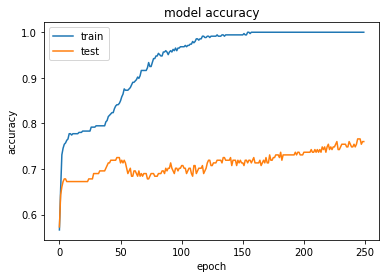

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### No improvement in validation accuracy

In [27]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

## Dropping day columns

In [28]:
X=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [29]:
std=StandardScaler()
X=std.fit_transform(X)
model3=Sequential()
model3.add(Dense(21,  activation='relu'))
model3.add(Dense(15,  activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model3.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 44ms/step - loss: 0.6878 - accuracy: 0.6214 - val_loss: 0.7097 - val_accuracy: 0.5263
Epoch 2/250
7/7 [==============================] - 0s 9ms/step - loss: 0.6629 - accuracy: 0.6647 - val_loss: 0.6999 - val_accuracy: 0.5731
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6424 - accuracy: 0.7052 - val_loss: 0.6934 - val_accuracy: 0.5965
Epoch 4/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6254 - accuracy: 0.7254 - val_loss: 0.6888 - val_accuracy: 0.6140
Epoch 5/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6097 - accuracy: 0.7312 - val_loss: 0.6855 - val_accuracy: 0.6374
Epoch 6/250
7/7 [==============================] - 0s 9ms/step - loss: 0.5958 - accuracy: 0.7486 - val_loss: 0.6837 - val_accuracy: 0.6667
Epoch 7/250
7/7 [==============================] - 0s 9ms/step - loss: 0.5842 - accuracy: 0.7543 - val_loss: 0.6827 - val_accuracy: 0.6725
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.3165 - accuracy: 0.8497 - val_loss: 0.8252 - val_accuracy: 0.7485
Epoch 60/250
7/7 [==============================] - 0s 7ms/step - loss: 0.3118 - accuracy: 0.8555 - val_loss: 0.8316 - val_accuracy: 0.7485
Epoch 61/250
7/7 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.8613 - val_loss: 0.8384 - val_accuracy: 0.7544
Epoch 62/250
7/7 [==============================] - 0s 8ms/step - loss: 0.3029 - accuracy: 0.8642 - val_loss: 0.8403 - val_accuracy: 0.7602
Epoch 63/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.8671 - val_loss: 0.8468 - val_accuracy: 0.7544
Epoch 64/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2932 - accuracy: 0.8671 - val_loss: 0.8551 - val_accuracy: 0.7602
Epoch 65/250
7/7 [==============================] - 0s 8ms/step - loss: 0.2887 - accuracy: 0.8728 - val_loss: 0.8612 - val_accuracy: 0.7602
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.1083 - accuracy: 0.9653 - val_loss: 1.2526 - val_accuracy: 0.8246
Epoch 118/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1066 - accuracy: 0.9624 - val_loss: 1.2605 - val_accuracy: 0.8246
Epoch 119/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 1.2667 - val_accuracy: 0.8363
Epoch 120/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1029 - accuracy: 0.9769 - val_loss: 1.2722 - val_accuracy: 0.8304
Epoch 121/250
7/7 [==============================] - 0s 7ms/step - loss: 0.1013 - accuracy: 0.9740 - val_loss: 1.2778 - val_accuracy: 0.8480
Epoch 122/250
7/7 [==============================] - 0s 8ms/step - loss: 0.1000 - accuracy: 0.9740 - val_loss: 1.2838 - val_accuracy: 0.8421
Epoch 123/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0989 - accuracy: 0.9740 - val_loss: 1.2922 - val_accuracy: 0.8480
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0465 - accuracy: 0.9913 - val_loss: 1.6105 - val_accuracy: 0.8713
Epoch 176/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0453 - accuracy: 0.9971 - val_loss: 1.6207 - val_accuracy: 0.8713
Epoch 177/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9971 - val_loss: 1.6245 - val_accuracy: 0.8655
Epoch 178/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0442 - accuracy: 0.9942 - val_loss: 1.6312 - val_accuracy: 0.8655
Epoch 179/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0430 - accuracy: 0.9971 - val_loss: 1.6359 - val_accuracy: 0.8655
Epoch 180/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9942 - val_loss: 1.6434 - val_accuracy: 0.8713
Epoch 181/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9942 - val_loss: 1.6458 - val_accuracy: 0.8655
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 1.9296 - val_accuracy: 0.8713
Epoch 234/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 1.9314 - val_accuracy: 0.8713
Epoch 235/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 1.9332 - val_accuracy: 0.8713
Epoch 236/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.9402 - val_accuracy: 0.8713
Epoch 237/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.9512 - val_accuracy: 0.8772
Epoch 238/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.9531 - val_accuracy: 0.8772
Epoch 239/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.9556 - val_accuracy: 0.8772
Epoch 240/250
7/7 [========

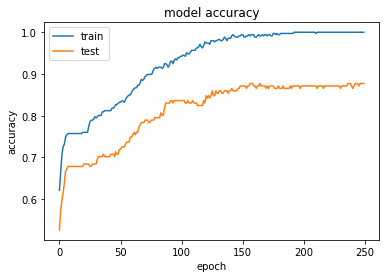

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observation:

## It can be seen from the graphs that model1 is giving better accuracy of 0.94 hence model1 can be chosen